# Convolutional Neural Networks (CNN)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


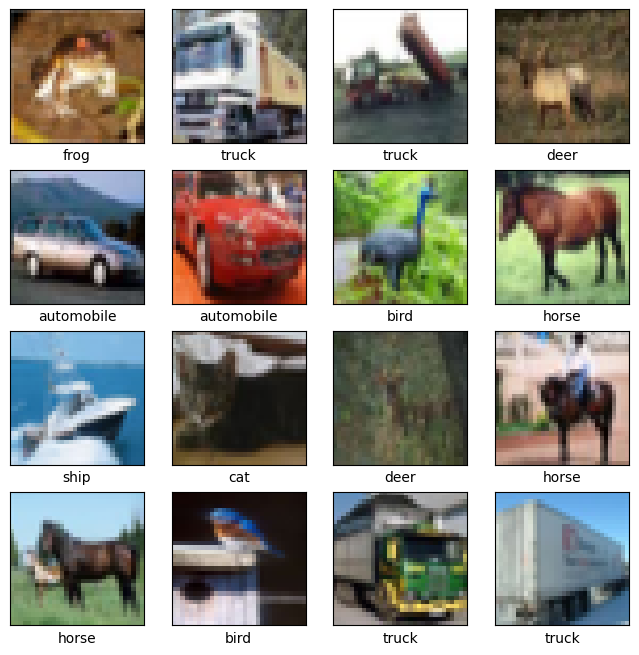

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt

# Load the data
data = tf.keras.datasets.cifar10.load_data()

# Split the data
(train_images, train_labels), (test_images, test_labels) = data

train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels, test_labels = train_labels.reshape(-1), test_labels.reshape(-1)

print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
    'ship', 'truck'
]



plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    # Convolutional part (3 Layers)
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), # 1st conv layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), # 2nd conv layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), # 3rd conv layer
    tf.keras.layers.Flatten(), # flatten before fully connected part
    # Fully connected part
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
    ])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    )

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,698 (487.10 KB)

 Trainable params: 124,698 (487.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3075 - loss: 1.8398
Epoch 1: val_accuracy improved from -inf to 0.46770, saving model to cifar10_best_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.3075 - loss: 1.8396 - val_accuracy: 0.4677 - val_loss: 1.4511
Epoch 2/30
1549/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5315 - loss: 1.2998
Epoch 2: val_accuracy improved from 0.46770 to 0.54680, saving model to cifar10_best_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5317 - loss: 1.2993 - val_accuracy: 0.5468 - val_loss: 1.2768
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6029 - loss: 1.1189
Epoch 3: val_accuracy improved from 0.54680 to 0.61980, saving model to cifar10_best_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6029 - loss: 1.1189 - val_accuracy: 0.6198 - val_loss: 1.0726
Epoch 4/30
1559/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6493 - loss: 0.9920
Ep

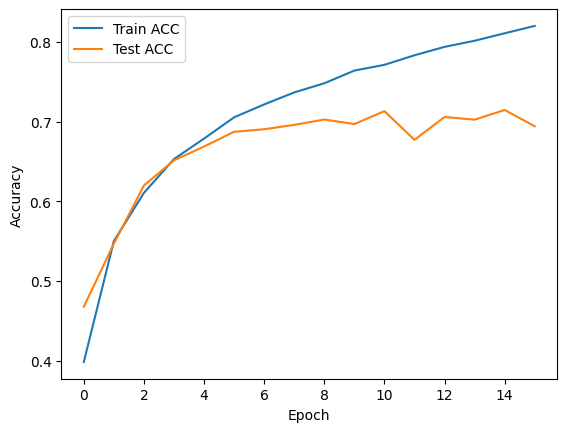

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      min_delta=0.0001,
                                      patience=5,
                                      verbose=1)

mc = tf.keras.callbacks.ModelCheckpoint('cifar10_best_model.keras',
                                        monitor='val_accuracy',
                                        verbose=1,
                                        save_best_only=True)

history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=30,
                    callbacks=[es, mc],
                    verbose=1)

# Plot train vs test accuracy
plt.plot(history.history['accuracy'], label='Train ACC')
plt.plot(history.history['val_accuracy'], label = 'Test ACC')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## 1- Improve model performance with *Regularization*
![](https://www.mdpi.com/applsci/applsci-12-07682/article_deploy/html/images/applsci-12-07682-g001.png)

Image Source: https://www.mdpi.com/2076-3417/12/15/7682

In [ ]:
model_adv = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    # Convolutional part (3 Layers)
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), # 1st conv layer
    tf.keras.layers.BatchNormalization(), # batch normalization
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    #
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), # 2nd conv layer
    tf.keras.layers.BatchNormalization(), # batch normalization
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    #
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), # 3rd conv layer
    tf.keras.layers.BatchNormalization(), # batch normalization
    tf.keras.layers.SpatialDropout2D(0.2), # dropout, but for filters instead of nodes
    #
    tf.keras.layers.Flatten(), # flatten before fully connected part
    # Fully connected part
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
    ])

model_adv.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    )
model_adv.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d               │ (None, 4, 4, 64)       │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,338 (489.60 KB)

 Trainable params: 125,018 (488.35 KB)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      min_delta=0.0001,
                                      patience=3,
                                      verbose=1)

mc = tf.keras.callbacks.ModelCheckpoint('cifar10_best_model_with_regularization.keras',
                                        monitor='val_accuracy',
                                        verbose=1,
                                        save_best_only=True)

history_adv = model_adv.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=30,
                    callbacks=[es, mc],
                    verbose=1)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3914 - loss: 1.6854
Epoch 1: val_accuracy improved from -inf to 0.53050, saving model to cifar10_best_model_with_regularization.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.3914 - loss: 1.6852 - val_accuracy: 0.5305 - val_loss: 1.3186
Epoch 2/30
1557/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6068 - loss: 1.1191
Epoch 2: val_accuracy improved from 0.53050 to 0.55070, saving model to cifar10_best_model_with_regularization.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6069 - loss: 1.1190 - val_accuracy: 0.5507 - val_loss: 1.2520
Epoch 3/30
1551/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6653 - loss: 0.9568
Epoch 3: val_accuracy improved from 0.55070 to 0.57950, saving model to cifar10_best_model_with_regularization.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6653 - loss: 0.9567 - val_accuracy: 0.5795 - val_loss: 1.2075
Epoch 4/30
1556/1563 ━━━━━━━━━

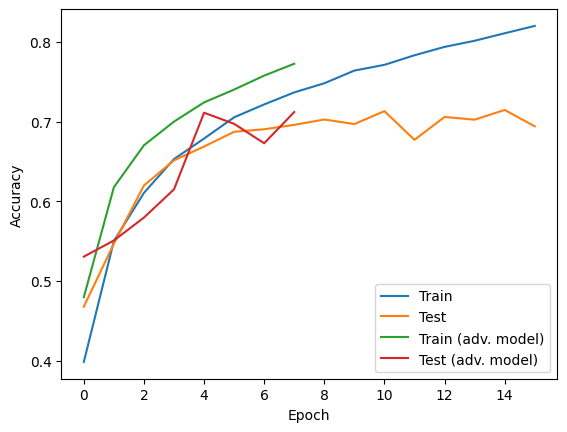

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.plot(history_adv.history['accuracy'], label = 'Train (adv. model)')
plt.plot(history_adv.history['val_accuracy'], label = 'Test (adv. model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
print("Model 1 (No Regularization): ")
model.evaluate(test_images,  test_labels)
print("Model 2 (With Regularization): ")
model_adv.evaluate(test_images,  test_labels);

Model 1 (No Regularization): 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6976 - loss: 1.0230
Model 2 (With Regularization): 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7158 - loss: 0.8448


## 2- Improve model performance with *Data Augmentation*
![](https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/creative-assets/s-migr/ul/g/ea/ee/data-augmentation-image-augment.png)

Image Source: https://www.ibm.com/de-de/think/topics/data-augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomZoom(0.2),
])

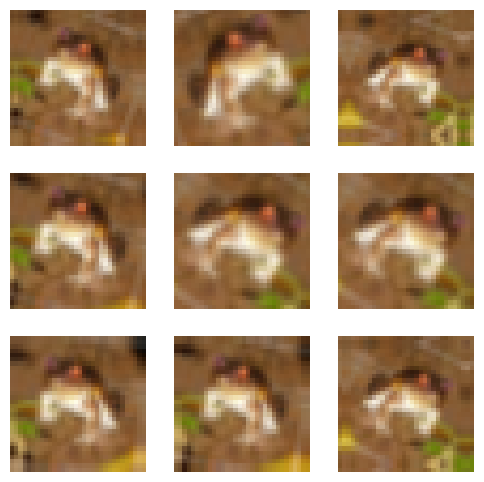

In [ ]:
sample_image = train_images[0:1].copy()
plt.figure(figsize=(6, 6))
for i in range(9):
    # Stress training=True
    augim = data_augmentation(sample_image, training=True)[0]
    ax = plt.subplot(3, 3, i + 1); plt.axis('off'); plt.imshow(augim)

In [ ]:
model_adv_DA = tf.keras.models.Sequential([
    data_augmentation,
    # Convolutional part (3 Layers)
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), # 1st conv layer
    tf.keras.layers.BatchNormalization(), # batch normalization
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    #
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), # 2nd conv layer
    tf.keras.layers.BatchNormalization(), # batch normalization
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    #
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), # 3rd conv layer
    tf.keras.layers.BatchNormalization(), # batch normalization
    tf.keras.layers.SpatialDropout2D(0.2), # dropout, but for filters instead of nodes
    #
    tf.keras.layers.Flatten(), # flatten before fully connected part
    # Fully connected part
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
    ])

model_adv_DA.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    )

model_adv_DA.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_1             │ (None, 4, 4, 64)       │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,338 (489.60 KB)

 Trainable params: 125,018 (488.35 KB)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      min_delta=0.0001,
                                      patience=3,
                                      verbose=1)

mc = tf.keras.callbacks.ModelCheckpoint('cifar10_best_model_with_regularization_dataaugmentation.keras',
                                        monitor='val_accuracy',
                                        verbose=1,
                                        save_best_only=True)

history_adv_DA = model_adv_DA.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=30,
                    callbacks=[es, mc],
                    verbose=1)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3272 - loss: 1.8397
Epoch 1: val_accuracy improved from -inf to 0.50320, saving model to cifar10_best_model_with_regularization_dataaugmentation.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.3272 - loss: 1.8396 - val_accuracy: 0.5032 - val_loss: 1.3717
Epoch 2/30
1561/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4899 - loss: 1.4284
Epoch 2: val_accuracy improved from 0.50320 to 0.50390, saving model to cifar10_best_model_with_regularization_dataaugmentation.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4899 - loss: 1.4284 - val_accuracy: 0.5039 - val_loss: 1.4261
Epoch 3/30
1561/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5386 - loss: 1.3048
Epoch 3: val_accuracy improved from 0.50390 to 0.56260, saving model to cifar10_best_model_with_regularization_dataaugmentation.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5386 - loss: 1.3048 - val_accurac

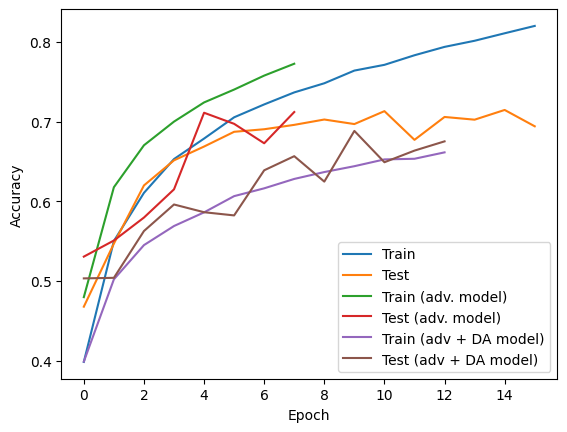

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.plot(history_adv.history['accuracy'], label = 'Train (adv. model)')
plt.plot(history_adv.history['val_accuracy'], label = 'Test (adv. model)')
plt.plot(history_adv_DA.history['accuracy'], label = 'Train (adv + DA model)')
plt.plot(history_adv_DA.history['val_accuracy'], label = 'Test (adv + DA model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

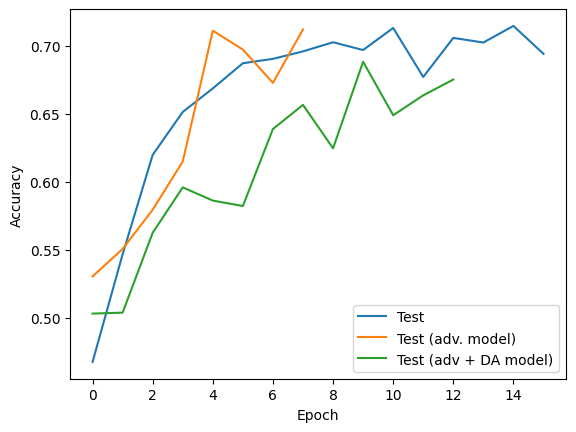

In [ ]:
# plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
# plt.plot(history_adv.history['accuracy'], label = 'Train (adv. model)')
plt.plot(history_adv.history['val_accuracy'], label = 'Test (adv. model)')
# plt.plot(history_adv_DA.history['accuracy'], label = 'Train (adv + DA model)')
plt.plot(history_adv_DA.history['val_accuracy'], label = 'Test (adv + DA model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
print("Model 1 (No Regularization): ")
model.evaluate(test_images,  test_labels)
print("Model 2 (With Regularization): ")
model_adv.evaluate(test_images,  test_labels)
print("Model 3 (With Regularization and Data Augmentation): ")
model_adv_DA.evaluate(test_images,  test_labels)

Model 1 (No Regularization): 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6976 - loss: 1.0230
Model 2 (With Regularization): 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7158 - loss: 0.8448
Model 3 (With Regularization and Data Augmentation): 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6830 - loss: 0.9349


[0.9558371305465698, 0.6751000285148621]

# Transfer Learning

Please note that MobileNet was trained on images scaled to lie within `[-1 , 1]` and we currently scale our images to lie withing `[0, 1]`.

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    #input_shape=(96, 96, 3), # refers to the shape we transfer from
    include_top=False, # cut off the head
    weights='imagenet', # pretrained on the ImageNet data
)
base_model.trainable = False # freeze the base model to not train it
                             # not needed for pure feature extraction,
                             # but needed for the feature extraction
                             # with multiple passes (as it is implemented here)

# Create new features
z_train = base_model.predict(2 * train_images - 1) # Note the rescaling
z_test = base_model.predict(2 * test_images - 1) # Note the rescaling

/tmp/ipython-input-3549966310.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
print("Number of Layers:", len(base_model.layers))
for idx, layer in enumerate(base_model.layers):
    print(idx, layer.name, layer.output.shape)

Number of Layers: 154
0 input_layer_4 (None, None, None, 3)
1 Conv1 (None, None, None, 32)
2 bn_Conv1 (None, None, None, 32)
3 Conv1_relu (None, None, None, 32)
4 expanded_conv_depthwise (None, None, None, 32)
5 expanded_conv_depthwise_BN (None, None, None, 32)
6 expanded_conv_depthwise_relu (None, None, None, 32)
7 expanded_conv_project (None, None, None, 16)
8 expanded_conv_project_BN (None, None, None, 16)
9 block_1_expand (None, None, None, 96)
10 block_1_expand_BN (None, None, None, 96)
11 block_1_expand_relu (None, None, None, 96)
12 block_1_pad (None, None, None, 96)
13 block_1_depthwise (None, None, None, 96)
14 block_1_depthwise_BN (None, None, None, 96)
15 block_1_depthwise_relu (None, None, None, 96)
16 block_1_project (None, None, None, 24)
17 block_1_project_BN (None, None, None, 24)
18 block_2_expand (None, None, None, 144)
19 block_2_expand_BN (None, None, None, 144)
20 block_2_expand_relu (None, None, None, 144)
21 block_2_depthwise (None, None, None, 144)
22 block_2_de

In [ ]:
## Extracting features from a specific layer:
# layer_index = 80
# selected_layer = base_model.layers[layer_index].output
## if you want to get layer by name, you can use this function base_model.get_layer(layer_name).output

# feature_extractor = tf.keras.models.Model(inputs=base_model.input, outputs=selected_layer)
# z_train = feature_extractor.predict(2 * train_images - 1) # Note the rescaling
# z_test = feature_extractor.predict(2 * test_images - 1) # Note the rescaling

In [ ]:
z_train.shape

(50000, 1, 1, 1280)

In [ ]:
model_pfe = tf.keras.models.Sequential([
    # flatten before fully connected part
    tf.keras.layers.Flatten(input_shape=(1, 1, 1280)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
    ])
model_pfe.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    )
model_pfe.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,762 (331.10 KB)

 Trainable params: 84,762 (331.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_pfe = model_pfe.fit(z_train, train_labels,
                            validation_data=(z_test, test_labels),
                            epochs=15, verbose=0)

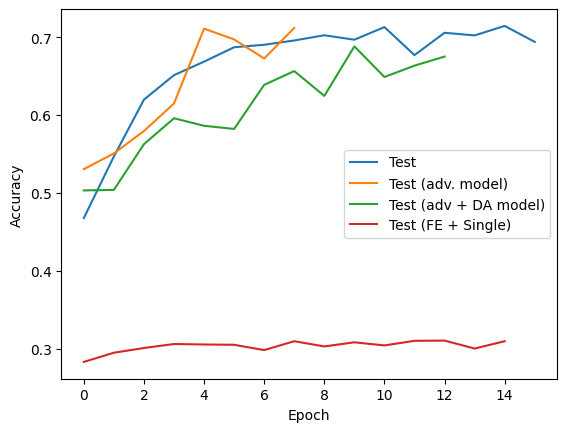

In [ ]:
# plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
# plt.plot(history_adv.history['accuracy'], label = 'Train (adv. model)')
plt.plot(history_adv.history['val_accuracy'], label = 'Test (adv. model)')
# plt.plot(history_adv_DA.history['accuracy'], label = 'Train (adv + DA model)')
plt.plot(history_adv_DA.history['val_accuracy'], label = 'Test (adv + DA model)')
# plt.plot(history_adv_DA.history['accuracy'], label = 'Train (adv + DA model)')
plt.plot(history_pfe.history['val_accuracy'], label = 'Test (FE + Single)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
print("Model 1 (No Regularization): ")
model.evaluate(test_images,  test_labels)
print("Model 2 (With Regularization): ")
model_adv.evaluate(test_images,  test_labels)
print("Model 3 (With Regularization and Data Augmentation): ")
model_adv_DA.evaluate(test_images,  test_labels)
print("Model 4 (Feature Extraction-Single Pass): ")
model_pfe.evaluate(z_test,  test_labels)

Model 1 (No Regularization): 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6976 - loss: 1.0230
Model 2 (With Regularization): 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7158 - loss: 0.8448
Model 3 (With Regularization and Data Augmentation): 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6830 - loss: 0.9349
Model 4 (Feature Extraction-Single Pass): 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3089 - loss: 1.9163


[1.9244188070297241, 0.3095000088214874]

# Feature Extraction with Multiple Passes

In [ ]:
model_fe = tf.keras.models.Sequential([
    data_augmentation, # can still use data augmentation now
    base_model, # the pre-trained part
    tf.keras.layers.Flatten(), # flatten before fully connected part
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
    ])
model_fe.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    )
model_fe.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,340,618 (8.93 MB)

 Trainable params: 82,634 (322.79 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history_fe = model_fe.fit(2 * train_images - 1, train_labels,
                          validation_data=(2 * test_images - 1, test_labels),
                          epochs=15, verbose=0)

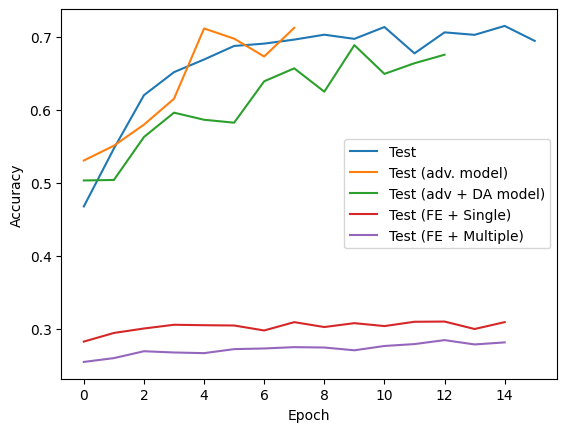

In [ ]:
# plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
# plt.plot(history_adv.history['accuracy'], label = 'Train (adv. model)')
plt.plot(history_adv.history['val_accuracy'], label = 'Test (adv. model)')
# plt.plot(history_adv_DA.history['accuracy'], label = 'Train (adv + DA model)')
plt.plot(history_adv_DA.history['val_accuracy'], label = 'Test (adv + DA model)')
# plt.plot(history_adv_DA.history['accuracy'], label = 'Train (adv + DA model)')
plt.plot(history_pfe.history['val_accuracy'], label = 'Test (FE + Single)')
plt.plot(history_fe.history['val_accuracy'], label = 'Test (FE + Multiple)')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
print("Model 5 (Feature Extraction - Multiple Pass): ")
model_fe.evaluate(2 * test_images - 1,  test_labels)

Model 5 (Feature Extraction - Multiple Pass): 
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2874 - loss: 1.9349


[1.9397382736206055, 0.2818000018596649]

# Using the pretrained model as any other layer

In [ ]:
model_weight_init = tf.keras.models.Sequential([
    data_augmentation,            # can still use data augmentation now
    tf.keras.applications.MobileNetV2(
        include_top=False,        # cut off the head
        weights='imagenet',       # pretrained on the ImageNet data
    ),                            # the pre-trained part
    tf.keras.layers.Flatten(),    # flatten before fully connected part
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
    ])
model_weight_init.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                                    # often a good idea
                                    # to use a lower learning rate
                                    #(default=0.001)
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    )

/tmp/ipython-input-3029806183.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  tf.keras.applications.MobileNetV2(


In [ ]:
history_weight_init = model_weight_init.fit(2 * train_images - 1,
                    train_labels,
                    validation_data=(2 * test_images - 1, test_labels),
                    epochs=15, verbose=0)

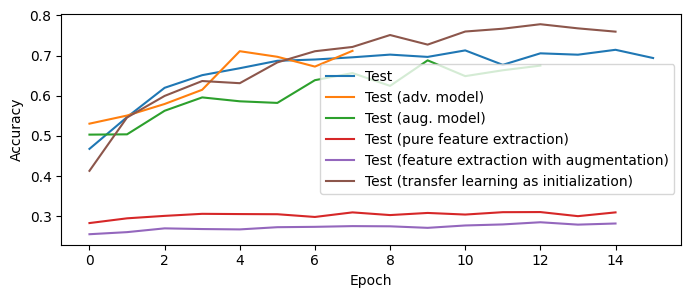

In [ ]:
plt.figure(figsize=(8, 3))  # Adjust the figsize to make the plot smaller
plt.plot(history.history['val_accuracy'],
         label = 'Test')
plt.plot(history_adv.history['val_accuracy'],
         label = 'Test (adv. model)')
plt.plot(history_adv_DA.history['val_accuracy'],
         label = 'Test (aug. model)')
plt.plot(history_pfe.history['val_accuracy'],
         label = 'Test (pure feature extraction)')
plt.plot(history_fe.history['val_accuracy'],
         label = 'Test (feature extraction with augmentation)')
plt.plot(history_weight_init.history['val_accuracy'],
         label = 'Test (transfer learning as initialization)')
plt.xlabel('Epoch');plt.ylabel('Accuracy');plt.legend()

In [ ]:
print("Model 6 (Pretrained as Initialization layer): ")
model_weight_init.evaluate(2 * test_images - 1,  test_labels)

Model 6 (Pretrained as Initialization layer): 
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7589 - loss: 0.7218


[0.715752363204956, 0.7597000002861023]

---
# Fine-tuning
Fine-tuning consists of unfreezing the frozen model base used for feature extraction and jointly training both the newly added part of the model (in this case, the fully connected classifier) and the base model. This is called fine-tuning because it slightly adjusts the more abstract representations of the model being reused to make them more relevant for the problem at hand.

As I mentioned earlier, it’s necessary to freeze the pretrained convolution base first to be able to train a randomly initialized classifier on top. For the same reason, it’s only possible to fine-tune the convolutional base once the classifier on top has already been trained. **If the classifier isn’t already trained, then the error signal propagating through the network during training will be too large, and the representations previously learned by the layers being fine-tuned will be destroyed. Thus, the steps for fine-tuning a network are as follows:**

1. Add your custom network on top of an already trained base network.
2. Freeze the base network.
3. Train the part you added.
4. Unfreeze the base network.
5. Jointly train both these layers and the part you added.

We have already implemented steps 1,2,3 when we trained single pass feature extraction model `model_pfe`. Let's implement steps 4 and 5

---
## Partial fine-tuning

When dealing with large pretrained models, you may sometimes only unfreeze some of the top layers of the convolutional base, and leave the lower layers frozen. Why?

- Earlier layers in the convolutional base encode **more-generic, reusable features**, whereas layers higher up encode **more-specialized features**. It’s more useful to fine-tune **the more specialized features because these are the ones that need to be repurposed on your new problem**.
- The more parameters you’re training, the more you’re at risk of overfitting. The convolutional base has 15 million parameters, so it would be risky to attempt to train it on your small dataset.
Thus, it can be a good strategy to fine-tune only the top three or four layers in the convolutional base.

In [ ]:
head_ft = tf.keras.models.clone_model(model_pfe)
head_ft.set_weights(model_pfe.get_weights())

base_model_ft = tf.keras.applications.mobilenet_v2.MobileNetV2(
    #input_shape= (96, 96, 3), # refers to the shape we transfer from...
    include_top=False,       # cut off the head
    weights='imagenet',      # pretrained on the ImageNet data
)

base_model_ft.training = False # to disable updating of means and
                               # variances in batch norm layers
                               # This is in some cases very important,
                               # but in this case it would still
                               # work fine if we did not do it

for layer in base_model_ft.layers[:100]: # layers after number 100
    layer.trainable = False              #in base_model now trainable

model_ft = tf.keras.models.Sequential([
    data_augmentation, # can still use data augmentation now
    base_model_ft, # the pre-trained part
    head_ft
])

model_ft.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # use a low learning rate
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    )

model_ft.summary()

/tmp/ipython-input-4203379995.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_ft = tf.keras.applications.mobilenet_v2.MobileNetV2(


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_6 (Sequential)       │ (None, 10)             │        84,762 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,342,746 (8.94 MB)

 Trainable params: 1,946,202 (7.42 MB)

 Non-trainable params: 396,544 (1.51 MB)

In [ ]:
history_ft = model_ft.fit(2 * train_images - 1, train_labels,
                          validation_data=(2 * test_images - 1, test_labels),
                          epochs=15, verbose=0)

In [ ]:
print("Model 7 (Finetuning): ")
model_ft.evaluate(2 * test_images - 1,  test_labels)

Model 7 (Finetuning): 
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6225 - loss: 1.0611


[1.0466240644454956, 0.6277999877929688]

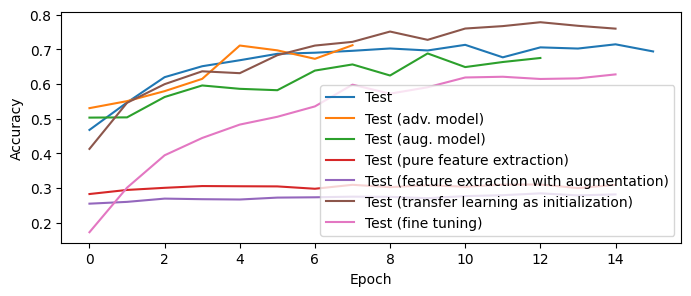

In [ ]:
plt.figure(figsize=(8, 3));
plt.plot(history.history['val_accuracy'],label = 'Test')
plt.plot(history_adv.history['val_accuracy'],label = 'Test (adv. model)')
plt.plot(history_adv_DA.history['val_accuracy'],label = 'Test (aug. model)')
plt.plot(history_pfe.history['val_accuracy'],label =
         'Test (pure feature extraction)')
plt.plot(history_fe.history['val_accuracy'],label =
         'Test (feature extraction with augmentation)')
plt.plot(history_weight_init.history['val_accuracy'],
         label = 'Test (transfer learning as initialization)')
plt.plot(history_ft.history['val_accuracy'],label = 'Test (fine tuning)')
plt.xlabel('Epoch');plt.ylabel('Accuracy');plt.legend()